In [1]:
import pandas as pd 
import numpy as np 

# get data 

In [2]:
ls

4.01_improved.ipynb
Feature Engineering, Selection, Extraction with chi.ipynb
KMeans_clustering_UL.ipynb
all.csv
attempt2.sql
data_business_segments.csv
data_countries.csv
data_finance.csv
data_integrations.csv
data_operations.csv
data_orders.csv
data_vertical.csv
exercise_2_SeD.sql
glovo_SED.ipynb
in_progress.sql
metrics.csv
notzerocost.csv
orders.sql
smetrics.csv
stores.sql
user_orders_results.csv
users.sql


In [3]:
vertical=pd.read_csv('data_vertical.csv')
segments=pd.read_csv('data_business_segments.csv')
integration=pd.read_csv('data_integrations.csv')
country=pd.read_csv('data_countries.csv')

In [4]:
orders=pd.read_csv('data_orders.csv')
ops=pd.read_csv('data_operations.csv')
finance=pd.read_csv('data_finance.csv')

In [5]:
vertical.head()

,partner_id,vertical
0,169385,Food
1,230660,Food
2,247635,Food
3,341110,Food
4,368335,Food


In [6]:
segments.head()

,partner_id,business_segment
0,169385,Local Hero
1,230660,Long Tail
2,247635,Chain
3,341110,Chain
4,368335,Long Tail


# merge data frames 
- common column is partner id 
- pd.merge behaves like an inner join
- to see the data transformation i will join two tables at each step
- this means I can check to ensure no data is lost 

## merge on segments first 

In [7]:
frames = [vertical, segments, integration, country]

In [8]:
# consistency check 
for f in frames:
    print(f.shape)
    print(f['partner_id'].nunique())

(46208, 2)
46208
(46208, 2)
46208
(46208, 2)
46208
(46208, 2)
46208


In [9]:
df= pd.merge(vertical, segments, on="partner_id")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46208 entries, 0 to 46207
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   partner_id        46208 non-null  int64 
 1   vertical          46208 non-null  object
 2   business_segment  46206 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [11]:
df1=pd.merge(df, integration, on="partner_id")

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46208 entries, 0 to 46207
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   partner_id        46208 non-null  int64 
 1   vertical          46208 non-null  object
 2   business_segment  46206 non-null  object
 3   is_integrated     46208 non-null  bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 1.5+ MB


In [13]:
df2=pd.merge(df1, country, on="partner_id")

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46208 entries, 0 to 46207
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   partner_id        46208 non-null  int64 
 1   vertical          46208 non-null  object
 2   business_segment  46206 non-null  object
 3   is_integrated     46208 non-null  bool  
 4   country           46208 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 1.8+ MB


In [15]:
df2.head()

,partner_id,vertical,business_segment,is_integrated,country
0,169385,Food,Local Hero,False,ES
1,230660,Food,Long Tail,False,PT
2,247635,Food,Chain,True,ES
3,341110,Food,Chain,False,ES
4,368335,Food,Long Tail,False,ES


In [16]:
# happy with the results of the merge 
partner_segments=df2

## Now merge on metrics 

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190708 entries, 0 to 190707
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190708 non-null  object 
 1   partner_id       190708 non-null  int64  
 2   orders_daily     190708 non-null  float64
 3   connected_hours  190708 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.8+ MB


In [18]:
orders.head()

,date,partner_id,orders_daily,connected_hours
0,2021-08-12,169385,1.0,7
1,2021-08-12,230660,10.0,0
2,2021-08-12,247635,5.0,0
3,2021-08-12,341110,3.0,6
4,2021-08-12,368335,3.0,0


In [19]:
metrics = [orders, ops, finance]

In [20]:
# consistency check 
for m in metrics:
    print(m.shape)
    print(m['partner_id'].nunique())

(190708, 4)
46208
(190708, 4)
46208
(190708, 4)
46208


### first aggregate each df at the partner_id

- considering the appropriate aggregation for each metric 

In [21]:
# aggregate by partner_id - keeping it off the index
ord_agg=orders.groupby(['partner_id'],as_index=False).agg({'orders_daily': 'sum', 'connected_hours': 'median'})

In [22]:
ord_agg.head()

,partner_id,orders_daily,connected_hours
0,910,27.0,13.0
1,1310,13.0,3.0
2,1935,22.0,0.0
3,2285,6.0,7.5
4,2310,9.0,0.0


In [23]:
ord_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46208 entries, 0 to 46207
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   partner_id       46208 non-null  int64  
 1   orders_daily     46208 non-null  float64
 2   connected_hours  46208 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.1 MB


In [24]:
ops.head()

,date,partner_id,avg_delivery_time_min,avg_preparation_time_min
0,2021-08-12,169385,18.216667,5.520000
1,2021-08-12,230660,36.888333,13.168571
2,2021-08-12,247635,41.230000,22.892000
3,2021-08-12,341110,38.644444,17.560000
4,2021-08-12,368335,33.683333,5.566667


In [25]:
ops_agg=ops.groupby(['partner_id'],as_index=False).agg({'avg_delivery_time_min': 'mean', 'avg_preparation_time_min': 'mean'})

In [26]:
ops_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46208 entries, 0 to 46207
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   partner_id                46208 non-null  int64  
 1   avg_delivery_time_min     46208 non-null  float64
 2   avg_preparation_time_min  46208 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.1 MB


In [27]:
finance.head()

,date,partner_id,avg_order_cost,avg_order_revenue
0,2021-08-12,169385,4.663740,11.442900
1,2021-08-12,230660,5.677032,9.390732
2,2021-08-12,247635,19.922868,26.112144
3,2021-08-12,341110,18.669470,26.663880
4,2021-08-12,368335,17.023120,13.384300


In [28]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190708 entries, 0 to 190707
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               190708 non-null  object 
 1   partner_id         190708 non-null  int64  
 2   avg_order_cost     190708 non-null  float64
 3   avg_order_revenue  190708 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.8+ MB


In [29]:
fin_agg=finance.groupby(['partner_id'],as_index=False).agg({'avg_order_cost': 'mean', 'avg_order_revenue': 'mean'})

In [30]:
fin_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46208 entries, 0 to 46207
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   partner_id         46208 non-null  int64  
 1   avg_order_cost     46208 non-null  float64
 2   avg_order_revenue  46208 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.1 MB


### Now merge the metric data frames with the segments 

In [31]:
df3=pd.merge(df2, ord_agg, on="partner_id")

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46208 entries, 0 to 46207
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   partner_id        46208 non-null  int64  
 1   vertical          46208 non-null  object 
 2   business_segment  46206 non-null  object 
 3   is_integrated     46208 non-null  bool   
 4   country           46208 non-null  object 
 5   orders_daily      46208 non-null  float64
 6   connected_hours   46208 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 2.5+ MB


In [33]:
df4=pd.merge(df3, ops_agg, on="partner_id")

In [34]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46208 entries, 0 to 46207
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   partner_id                46208 non-null  int64  
 1   vertical                  46208 non-null  object 
 2   business_segment          46206 non-null  object 
 3   is_integrated             46208 non-null  bool   
 4   country                   46208 non-null  object 
 5   orders_daily              46208 non-null  float64
 6   connected_hours           46208 non-null  float64
 7   avg_delivery_time_min     46208 non-null  float64
 8   avg_preparation_time_min  46208 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 3.2+ MB


In [35]:
df5=pd.merge(df4, fin_agg, on="partner_id")

In [36]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46208 entries, 0 to 46207
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   partner_id                46208 non-null  int64  
 1   vertical                  46208 non-null  object 
 2   business_segment          46206 non-null  object 
 3   is_integrated             46208 non-null  bool   
 4   country                   46208 non-null  object 
 5   orders_daily              46208 non-null  float64
 6   connected_hours           46208 non-null  float64
 7   avg_delivery_time_min     46208 non-null  float64
 8   avg_preparation_time_min  46208 non-null  float64
 9   avg_order_cost            46208 non-null  float64
 10  avg_order_revenue         46208 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 3.9+ MB


In [37]:
df5.head()

,partner_id,vertical,business_segment,is_integrated,country,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue
0,169385,Food,Local Hero,False,ES,2.0,9.0,21.933333,13.095000,5.985465,13.153395
1,230660,Food,Long Tail,False,PT,49.0,0.0,27.012576,7.911087,7.173861,12.398682
2,247635,Food,Chain,True,ES,23.0,0.0,31.202143,15.155286,13.232501,20.655842
3,341110,Food,Chain,False,ES,25.0,6.0,36.096296,11.674931,15.703831,27.055993
4,368335,Food,Long Tail,False,ES,36.0,9.0,33.406841,10.569303,14.397053,18.680528


In [38]:
# happy with the merged results 
all_data=df5

# Task 1 - questions 

## 1. How many active partners do we have in our dataset?


In [39]:
# define 'active' ? as in they have placed orders recently ? 
# data only covers a week
print(orders['date'].min(),' - ', orders['date'].max())

2021-08-12  -  2021-08-18


In [40]:
# perhaps it is just a count of partners who dont have orders?
all_data['orders_daily'].min()
# I see that none of the partners here have less than 1 order 

1.0

In [41]:
# lets assume this means total number of partners in our data
all_data['partner_id'].nunique()

46208

In [42]:
print('we have',all_data['partner_id'].nunique(),'active partners')

we have 46208 active partners


## 2. What is the breakdown per country? And per business segment?

- show in a plot 
- summarise in a groupby 

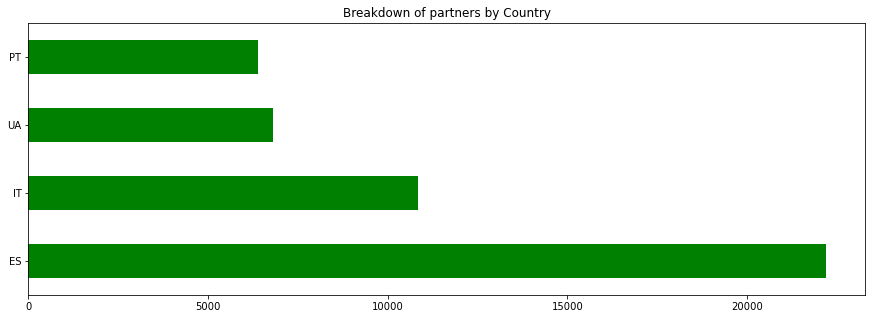

In [43]:
all_data['country'].value_counts().plot(kind='barh', color='green', figsize=(15,5),
                                        title='Breakdown of partners by Country');

In [44]:
all_data.groupby(['country']).size().sort_values().reset_index(name='count of partners')

,country,count of partners
0,PT,6377
1,UA,6808
2,IT,10840
3,ES,22183


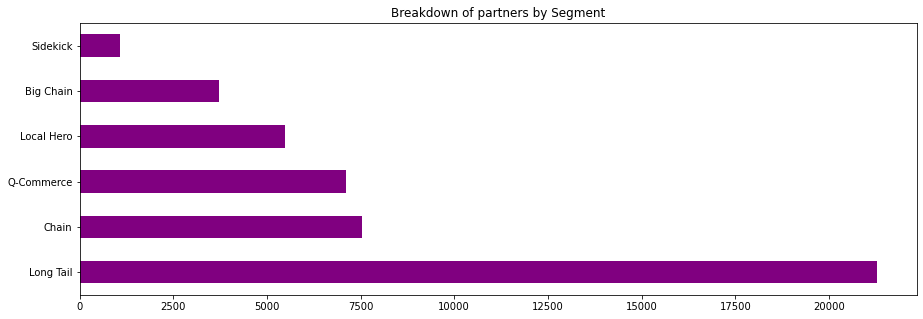

In [45]:
all_data['business_segment'].value_counts().plot(kind='barh', color='purple', figsize=(15,5),
                                        title='Breakdown of partners by Segment');

In [46]:
all_data.groupby(['business_segment']).size().sort_values().reset_index(name='count of partners')

,business_segment,count of partners
0,Sidekick,1089
1,Big Chain,3730
2,Local Hero,5475
3,Q-Commerce,7110
4,Chain,7529
5,Long Tail,21273


## 3. What percentage of partners have delivered 80% of the orders?

##### Steps    
        - calculate the % of total orders each partner contributes
        - sort the df by that % of total - biggest at the top 
        - create a running total of those %s - so as we go down the df we will reach 80%
        - cut the df at the 80% mark
        - check the tail of the cut to confirm we have not surpassed 80%
        - whats the length of that cut? 
        - add one more row (conceptually) to ensure we pass 80% 
        - calculate the proportion as no of rows of cut df / no of rows full df

In [47]:
all_data['pctoftotal']= 100 * all_data['orders_daily']/all_data['orders_daily'].sum()

In [48]:
sorted_df=all_data.sort_values(by='pctoftotal', ascending=False)

In [49]:
sorted_df['cumul_pct'] = sorted_df['pctoftotal'].cumsum()

In [50]:
cut_df=sorted_df[(sorted_df['cumul_pct'] <= 80)]

In [51]:
cut_df.shape

(9872, 13)

In [52]:
cut_df.tail()

,partner_id,vertical,business_segment,is_integrated,country,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue,pctoftotal,cumul_pct
14884,6612610,Food,Chain,False,ES,25.0,0.0,36.454286,12.752679,10.969216,28.533285,0.001981,79.990411
6257,5922535,Food,Long Tail,False,UA,25.0,11.0,40.581071,11.578810,3.338987,8.715699,0.001981,79.992392
2722,5320885,Food,Local Hero,False,UA,25.0,0.0,57.023095,18.271333,3.846458,14.158775,0.001981,79.994373
29581,6000210,Food,Big Chain,False,ES,25.0,13.0,22.746151,8.458921,7.286558,12.863693,0.001981,79.996355
6195,7746385,Food,Long Tail,False,PT,25.0,11.0,28.836848,9.621776,8.078692,21.195312,0.001981,79.998336


In [53]:
sorted_df.shape

(46208, 13)

In [54]:
pctofpartners=100*(cut_df.shape[0]+1)/sorted_df.shape[0]

In [55]:
print(round(pctofpartners,2),'% of partners account for 80% of orders')

21.37 % of partners account for 80% of orders


In [56]:
# as a function 
def get_proportion_p(df, column, pct):
    df['pctoftotal']= 100 * df[column]/df[column].sum()
    sorteddf=df.sort_values(by='pctoftotal', ascending=False)
    sorteddf['cumul_pct'] = sorted_df['pctoftotal'].cumsum()
    cutdf=sorteddf[(sorted_df['cumul_pct'] <= pct)]
    pctofp=100*(cutdf.shape[0]+1)/df.shape[0]
    return print(round(pctofp,2),'% of partners account for',pct,'% of all orders')

In [57]:
get_proportion_p(all_data, 'orders_daily', 80)

21.37 % of partners account for 80 % of all orders


In [58]:
# an example - what if we wanted to find our top 50% hitters ?
get_proportion_p(all_data, 'orders_daily', 50)

4.37 % of partners account for 50 % of all orders


## 4. What is the average delivery time in Portugal (PT)?

In [59]:
all_data.columns

Index(['partner_id', 'vertical', 'business_segment', 'is_integrated',
       'country', 'orders_daily', 'connected_hours', 'avg_delivery_time_min',
       'avg_preparation_time_min', 'avg_order_cost', 'avg_order_revenue',
       'pctoftotal'],
      dtype='object')

In [60]:
portugal=all_data[(all_data['country']=='PT')]

In [61]:
avg_del_time_pt=round(portugal['avg_delivery_time_min'].mean(),2)

In [62]:
print('The average delivery time in portugal is',avg_del_time_pt,'minutes')

The average delivery time in portugal is 35.26 minutes


In [63]:
all_data.is_integrated.unique()

array([False,  True])

## 5. What is the share of orders that integrated partners delivered?

##### Steps:
- create summary table by integrated true/false
- add a % of total column - rounded to 2dp 
- show the integrated % of total only 

In [64]:
integ=all_data.groupby(['is_integrated'],as_index=False).agg({"orders_daily": "sum"})

In [65]:
integ

,is_integrated,orders_daily
0,False,537057.0
1,True,724818.0


In [66]:
integ['share']= round(100 * integ['orders_daily']/integ['orders_daily'].sum(),2)

In [67]:
integ['share'][1]

57.44

In [68]:
print('share of orders from integrated partners is',integ['share'][1],'%' )

share of orders from integrated partners is 57.44 %


## 6. What is the distribution of the cost per order? 
 Does it follow any known
 distribution? Is there anything odd in the distribution?

- presuming this means distribution of avg order cost by partner
- create a histogram of the avg_order cost by partner
- use seaborn which is easier to customise
- try some variations on the plot to explain the distribution type 

In [69]:
all_data.columns

Index(['partner_id', 'vertical', 'business_segment', 'is_integrated',
       'country', 'orders_daily', 'connected_hours', 'avg_delivery_time_min',
       'avg_preparation_time_min', 'avg_order_cost', 'avg_order_revenue',
       'pctoftotal'],
      dtype='object')

In [70]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("white")

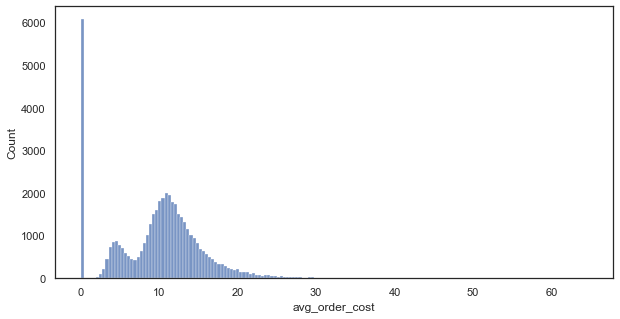

In [71]:
#raw histogram 
sns.histplot(all_data['avg_order_cost']);

In [72]:
# remove the 0 bar to better view the distribution 
notzerocost=all_data[all_data['avg_order_cost']!=0]

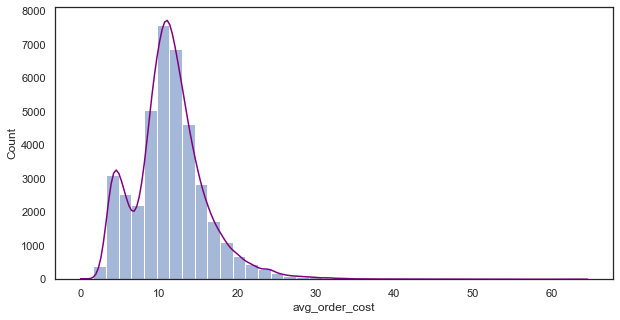

In [73]:
# adding a kde line and changing the colour 
ax=sns.histplot(notzerocost['avg_order_cost'],bins=40,kde=True)
ax.lines[0].set_color('purple');

##### Distribution is bi modal. 
- Normally this means the two peaks of the distribution shape can be explained by another feature of the data 
- Below I explore the segments of the data, showing each segment on colour inside the hist plot 

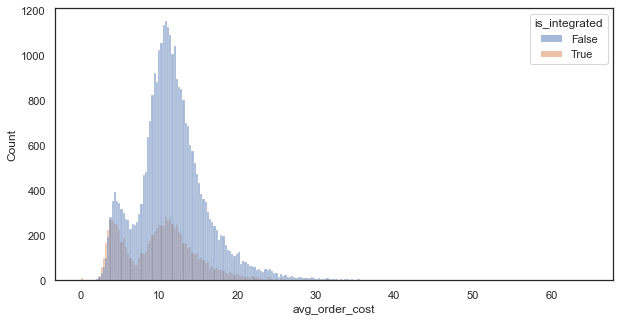

In [74]:
# exploring with colour on integration status
sns.histplot(data=notzerocost,x='avg_order_cost',hue="is_integrated");
# this does not explain the bi modal split 

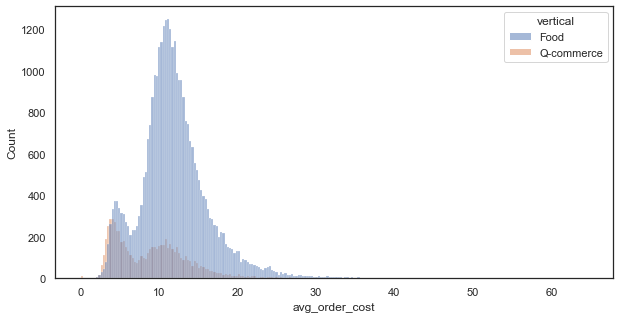

In [75]:
# exploring with colour on business vertical
sns.histplot(data=notzerocost,x='avg_order_cost',hue="vertical");
# this does not explain the bi modal split 

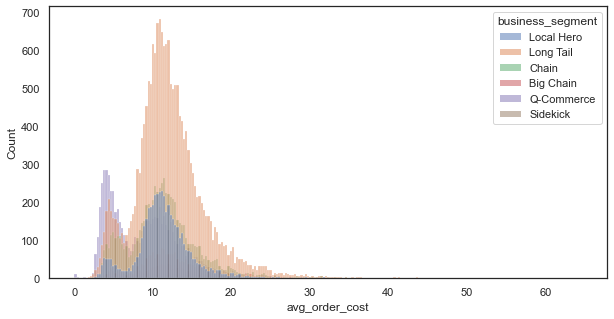

In [76]:
# exploring with colour on business segment 
sns.histplot(data=notzerocost,x='avg_order_cost',hue="business_segment");
# there is overlap but this does not explain the full bi modal split 

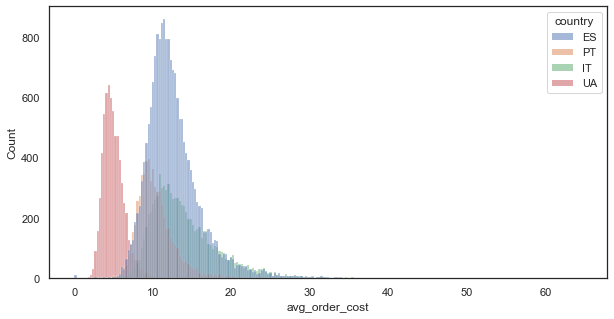

In [77]:
# exploring with colour on different segments 
sns.histplot(data=notzerocost,x='avg_order_cost',hue="country");
# adding country does explain the bi modal split
# because the first peak of the distribution is only for UA (Ukraine)
# this indicates that the order costs per partners in ukraine is lower than in other countries
# gut feel - conclusion feels solid 

In [78]:
# note, there are a small number of less than 1 (euro?) average cost 
# all are from Spain
# this finding does challenge the above observation 
notzerocost[(notzerocost['avg_order_cost']<1)]

,partner_id,vertical,business_segment,is_integrated,country,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue,pctoftotal
681,2096735,Q-commerce,Q-Commerce,True,ES,1828.0,16.5,21.118863,5.203668,0.098524,17.406779,0.144864
1317,2096710,Q-commerce,Q-Commerce,True,ES,1394.0,32.0,29.866254,4.402962,0.020391,3.566118,0.110471
1965,3471385,Q-commerce,Q-Commerce,True,ES,1253.0,92.5,19.231327,4.708213,0.096029,10.727587,0.099297
2139,6209060,Q-commerce,Q-Commerce,True,ES,394.0,98.0,38.077881,7.897959,0.475561,27.298684,0.031223
8882,1821010,Q-commerce,Q-Commerce,True,ES,1704.0,76.0,20.451079,4.127902,0.026099,10.325428,0.135037
10720,5375435,Q-commerce,Q-Commerce,True,ES,308.0,111.0,36.924476,7.834295,0.016297,26.125825,0.024408
10871,5041310,Q-commerce,Q-Commerce,True,ES,1185.0,108.0,36.739053,8.297608,0.162925,16.655772,0.093908
11360,4456760,Q-commerce,Q-Commerce,True,ES,1993.0,111.0,25.920748,5.737098,0.125910,-8.798018,0.157940
15096,4414635,Q-commerce,Q-Commerce,True,ES,83.0,104.0,21.145679,4.755899,0.054442,25.083015,0.006578
16228,8483210,Q-commerce,Q-Commerce,True,ES,125.0,13.5,14.678987,2.685328,0.205271,2.759479,0.009906


## 7. What is the number of orders compared to connected time? Is there a correlation between the two?

- plot scatter or regplot 
- calculate correlation score pearsons 

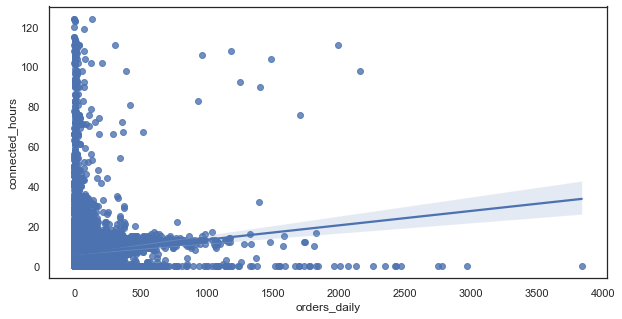

In [79]:
sns.regplot(data=all_data, x="orders_daily", y="connected_hours");

###### Findings
- the meaning of 'connected hours' is unclear - assumed it was within 24 hours but values extend to 120 +
- lots of noise around 0 values on both axes
- evidence for potential correlation with pearsons but plotting unclear 

OPTIONS : 
- run correlation statistical test 
- remove 0 connected hours + 0 orders and plot again 
- look at country influence on plot 

In [80]:
from scipy.stats import pearsonr

In [81]:
corr, _ = pearsonr(all_data["orders_daily"], all_data["connected_hours"])

In [82]:
_, p_value=pearsonr(all_data["orders_daily"], all_data["connected_hours"])

In [94]:
print('Looking at the Pearsons correlation which returns a coefficient of: ', 
      "%.4f" % (corr), 'and a very low p-value of: ', p_value, 
      'indicating a higher statistical correlation than is visible in the plot.')

Looking at the Pearsons correlation which returns a coefficient of:  0.0855 and a very low p-value of:  1.1530757186158163e-75 indicating a higher statistical correlation than is visible in the plot.


In [95]:
no_zeros=all_data[(all_data.orders_daily >= 1) & (all_data.connected_hours >=1)]

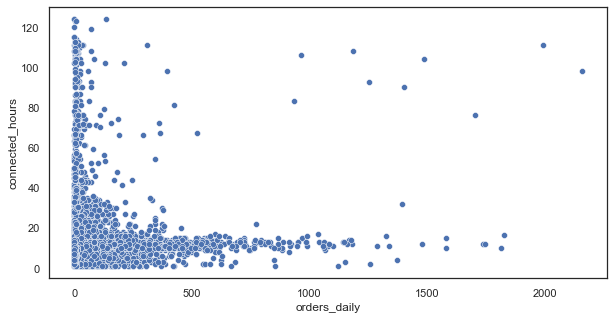

In [96]:
sns.scatterplot(data=no_zeros, x="orders_daily", y="connected_hours");

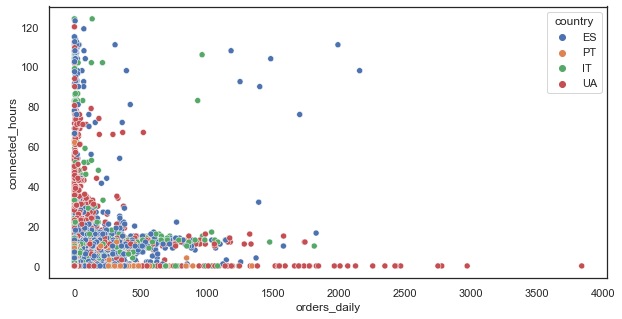

In [97]:
sns.scatterplot(data=all_data, x="orders_daily", y="connected_hours", hue="country");

##### Findings 

- it looks like UA explains some of the disparity in the plot 
- look at the other countries 

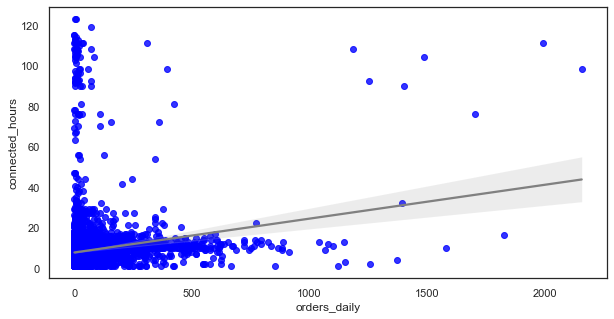

In [98]:
# looking at spain only 
sns.regplot(data=no_zeros[(no_zeros['country']=='ES')], x="orders_daily", y="connected_hours", scatter_kws={"color": "blue"}, line_kws={"color": "grey"});

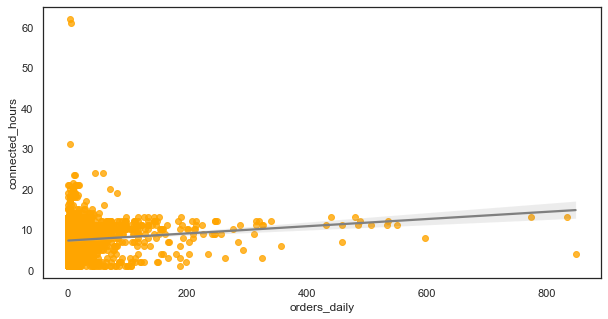

In [99]:
# looking at portugal
sns.regplot(data=no_zeros[(no_zeros['country']=='PT')], x="orders_daily", y="connected_hours", scatter_kws={"color": "orange"}, line_kws={"color": "grey"});

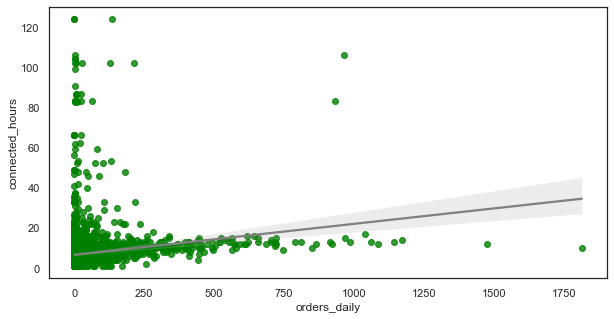

In [100]:
#looking at italy 
sns.regplot(data=no_zeros[(no_zeros['country']=='IT')], x="orders_daily", y="connected_hours", scatter_kws={"color": "green"}, line_kws={"color": "grey"});

## 8. What are the differences in the metrics for food vs Q-commerce?

- Q commerce is a Business segment but it also appears in vertical
- Food is a vertical 

###### Steps :
- keep only metrics in new df, plus vertical
- create df food and summarise with descriptive stats + histogram
- create df q commerce and summarise with descriptive stats + histogram
- plot to explore verticals side by side 
- examine metrics that stand out as very different between those verticals

In [101]:
all_data.columns

Index(['partner_id', 'vertical', 'business_segment', 'is_integrated',
       'country', 'orders_daily', 'connected_hours', 'avg_delivery_time_min',
       'avg_preparation_time_min', 'avg_order_cost', 'avg_order_revenue',
       'pctoftotal'],
      dtype='object')

In [102]:
metrics=all_data.drop(['partner_id', 'business_segment', 'is_integrated','country', 'pctoftotal'],axis=1)

In [103]:
metrics['vertical'].value_counts()

Food          39098
Q-commerce     7110
Name: vertical, dtype: int64

In [104]:
food=metrics[metrics['vertical']=='Food']

In [105]:
qm=metrics[metrics['vertical']!='Food']

In [106]:
food.describe()

,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue
count,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,29.091514,5.955535,47.077237,11.381449,10.092616,17.556413
std,96.082952,5.594801,32.852412,7.862592,5.926439,8.898046
min,1.000000,0.000000,2.508333,-27.770000,0.000000,0.000000
25%,3.000000,2.000000,27.932883,8.090000,7.089677,11.793458
50%,8.000000,6.000000,33.940833,11.572198,10.773848,17.019655
75%,22.000000,9.000000,45.349306,15.010000,13.354930,22.051469
max,3836.000000,112.000000,240.550000,646.170000,63.490500,169.380000


In [107]:
qm.describe()

,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue
count,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000
mean,17.504219,7.013994,33.202915,12.515824,8.851049,11.738447
std,69.420540,15.012628,15.098298,6.423946,4.950107,8.455756
min,1.000000,0.000000,5.016667,-28.754325,0.000000,-8.798018
25%,2.000000,0.000000,24.146875,8.530404,4.680724,6.809863
50%,5.000000,0.000000,30.121922,11.970183,8.611373,10.335579
75%,14.000000,10.000000,38.457986,15.601785,11.884291,14.323597
max,2157.000000,124.000000,218.600000,59.570000,64.643340,325.943310


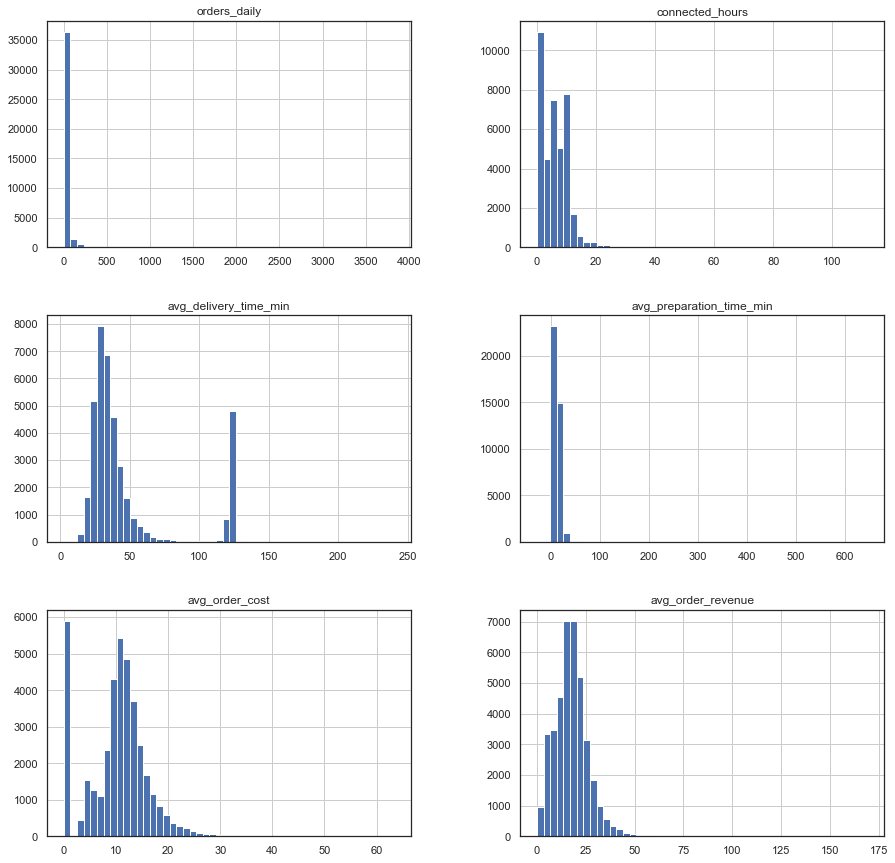

In [108]:
food.hist(bins=50,figsize=(15,15));

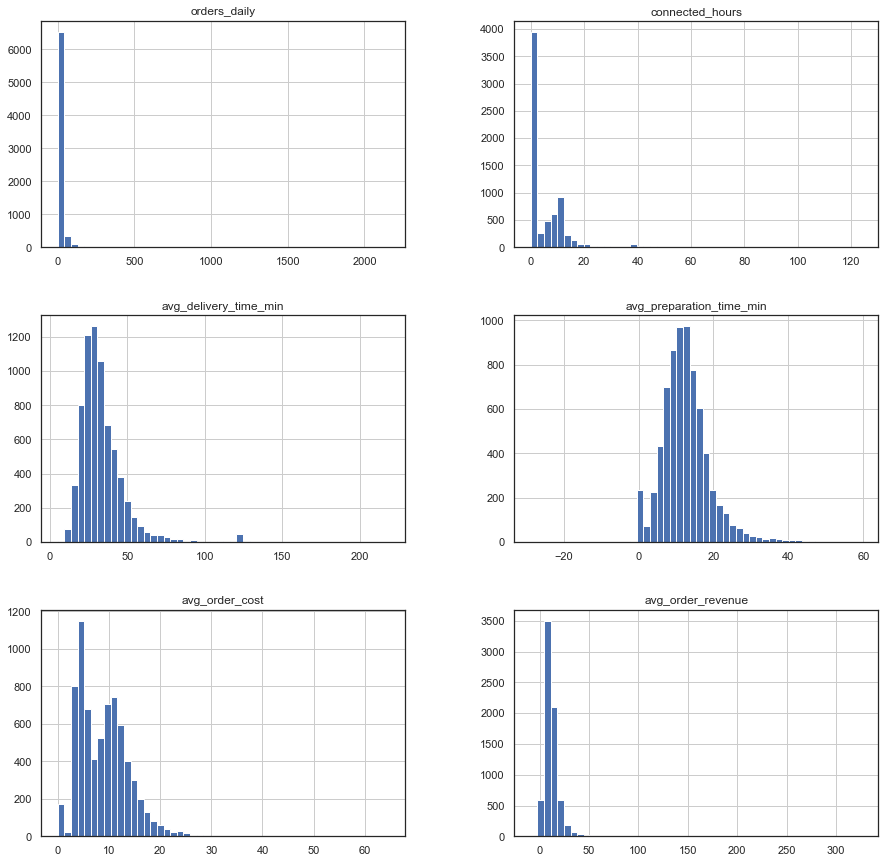

In [109]:
qm.hist(bins=50,figsize=(15,15));

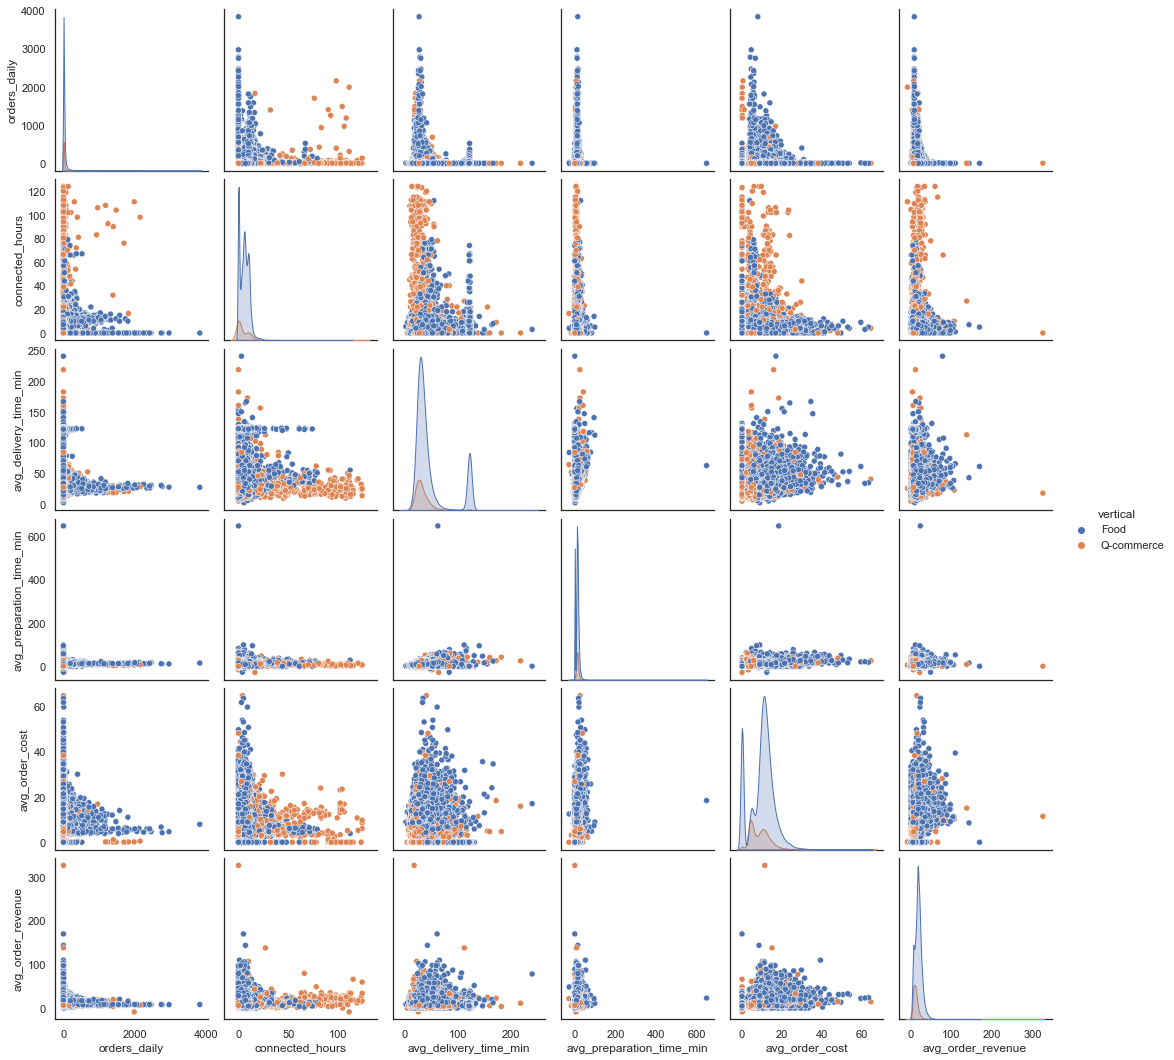

In [110]:
# this plot gives visibility over the interconnectivity of all metrics 
sns.pairplot(metrics, hue='vertical');

In [111]:
metrics.columns

Index(['vertical', 'orders_daily', 'connected_hours', 'avg_delivery_time_min',
       'avg_preparation_time_min', 'avg_order_cost', 'avg_order_revenue'],
      dtype='object')

In [112]:
metrics.to_csv('metrics.csv')

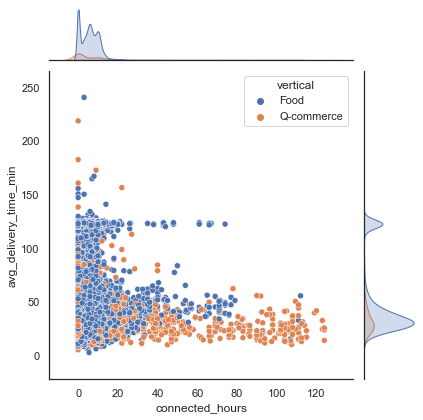

In [113]:
sns.jointplot(data=metrics, x="connected_hours", y="avg_delivery_time_min", hue='vertical');

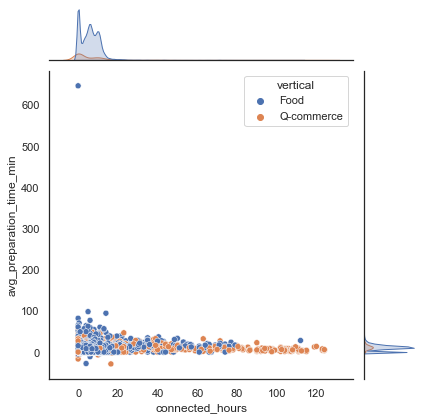

In [114]:
sns.jointplot(data=metrics, x="connected_hours", y="avg_preparation_time_min", hue='vertical');

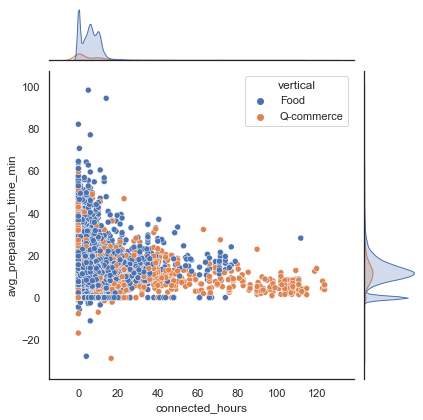

In [115]:
# this step removes the big outlier at +600 mins 
sns.jointplot(data=metrics[(metrics['avg_preparation_time_min']<200)], x="connected_hours", y="avg_preparation_time_min", hue='vertical');

## 9. Among all the possible combinations of dimensions (segments), which one has the highest number of partners?

In [116]:
all_data.columns

Index(['partner_id', 'vertical', 'business_segment', 'is_integrated',
       'country', 'orders_daily', 'connected_hours', 'avg_delivery_time_min',
       'avg_preparation_time_min', 'avg_order_cost', 'avg_order_revenue',
       'pctoftotal'],
      dtype='object')

In [117]:
summary=pd.pivot_table(all_data, values='partner_id', index='business_segment', 
               columns=['country','vertical','is_integrated'],
               aggfunc='count')

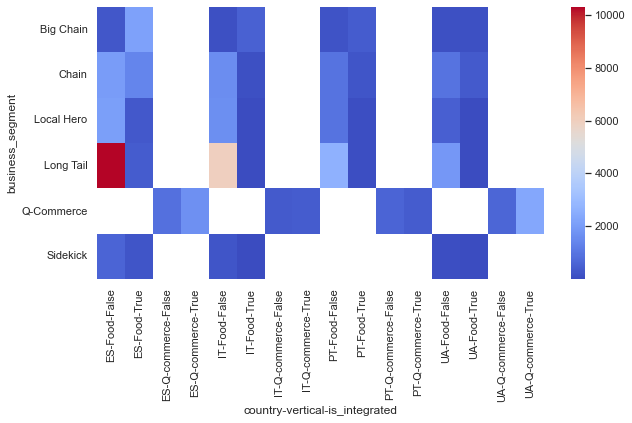

In [118]:
sns.heatmap(summary, annot=False, cmap="coolwarm");

In [119]:
summ=pd.DataFrame(all_data.groupby(['is_integrated', 'country','vertical','business_segment']).size())

In [120]:
summ.rename(columns={0: 'no of partners'}, inplace=True)

In [121]:
summ.sort_values(by='no of partners', ascending=False).head(1)

,,,,no of partners
is_integrated,country,vertical,business_segment,
False,ES,Food,Long Tail,10297


As shown in the plot and summary dataframe, the combination of segments with the most partners is:

        - not integrated
        - Spain
        - vertical is Food
        - business segment is Long Tail

## 10. Executive summary - see slides 

# Task 2 

## Option 2. Now that you are familiar with Glovo’s partners, imagine we want to run an experiment in Spain (ES). Create two groups of partners that behave similarly in terms of metrics. Make sure all types of partners are represented

##### Approach 
- use K Means clustering to create two groups with similar metrics 
- this unsupervised model will find two groups based on similar characteristics 
- expect groups to be different in sizes 
- however by processing the data it might be possible to bring the clusters towards eachother in terms of size


### create reduced data frame 

We are only interested in spanish partners, and the metrics because we are not limiting to any type of partner 
- select dtypes = number 
- the partner id is held as an INT 

In [122]:
Spain=all_data[all_data['country']=='ES']

In [123]:
pd.options.mode.chained_assignment = None  # default='warn'

In [124]:
s_metrics=Spain.select_dtypes(include='number')

In [125]:
s_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22183 entries, 0 to 46206
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   partner_id                22183 non-null  int64  
 1   orders_daily              22183 non-null  float64
 2   connected_hours           22183 non-null  float64
 3   avg_delivery_time_min     22183 non-null  float64
 4   avg_preparation_time_min  22183 non-null  float64
 5   avg_order_cost            22183 non-null  float64
 6   avg_order_revenue         22183 non-null  float64
 7   pctoftotal                22183 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.5 MB


In [126]:
s_metrics.drop(['pctoftotal'],axis=1, inplace = True)
# remove pctoftotal because this is a derived column 
#and we dont want to introduce multicollinearity 

### Move the partnerid to the index 

- this keeps it in the data frame but allows the clustering which is based on numeric data 

In [127]:
s_metrics.index=s_metrics.iloc[:,0]

In [128]:
s_metrics.head()

,partner_id,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue
partner_id,,,,,,,
169385,169385,2.0,9.0,21.933333,13.095000,5.985465,13.153395
247635,247635,23.0,0.0,31.202143,15.155286,13.232501,20.655842
341110,341110,25.0,6.0,36.096296,11.674931,15.703831,27.055993
368335,368335,36.0,9.0,33.406841,10.569303,14.397053,18.680528
472910,472910,13.0,5.0,34.386111,15.368056,10.151009,28.076562


In [129]:
s_metrics.drop(['partner_id'],axis=1, inplace = True)
# remove extra column 

In [130]:
s_metrics.rename_axis(None,inplace=True)
# remove extra header level 

### remove outliers and bad data 

In [131]:
s_metrics.describe()

,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue
count,22183.000000,22183.000000,22183.000000,22183.000000,22183.000000,22183.000000
mean,26.862913,6.152594,46.406121,10.556709,10.658593,18.504309
std,72.363379,7.636118,33.305302,6.599171,5.817047,9.053299
min,1.000000,0.000000,7.883333,-28.754325,0.000000,-8.798018
25%,3.000000,1.000000,27.513176,7.477750,9.107444,13.108256
50%,9.000000,6.000000,33.032667,10.972500,11.400975,17.891910
75%,23.000000,9.000000,42.933333,14.082589,13.643175,23.023890
max,2157.000000,123.000000,218.600000,98.150000,64.643340,169.380000


In [132]:
all_data.to_csv('all.csv')

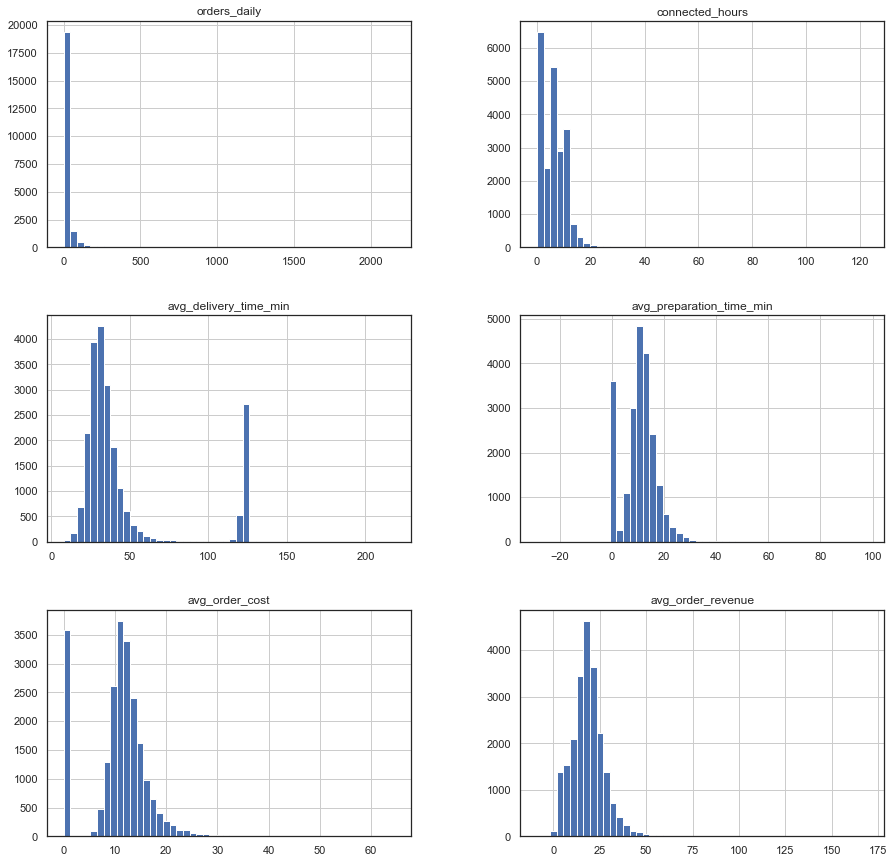

In [133]:
s_metrics.hist(bins=50,figsize=(15,15));

In [134]:
s_metrics=s_metrics[s_metrics['avg_order_cost']!=0]

In [135]:
# transform scale eg boxcox log trans
# deal with zeros 
# deal with bi modal 

### Scale metrics to be on similar scales 

- this will remove any amplifying features 

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(s_metrics)

MinMaxScaler()

In [137]:
scaled_s_metrics=scaler.transform(s_metrics)

In [138]:
cols=s_metrics.columns

In [139]:
# connect array back to a data frame 
scaled_s_metrics_df=pd.DataFrame(scaled_s_metrics,index= s_metrics.index,columns=cols)

In [140]:
scaled_s_metrics_df.head()

,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue
169385,0.000464,0.075630,0.066677,0.324531,0.092363,0.144264
247635,0.010204,0.000000,0.110664,0.340893,0.204500,0.193570
341110,0.011132,0.050420,0.133891,0.313254,0.242739,0.235631
368335,0.016234,0.075630,0.121127,0.304473,0.222519,0.180588
472910,0.005566,0.042017,0.125774,0.342583,0.156818,0.242338


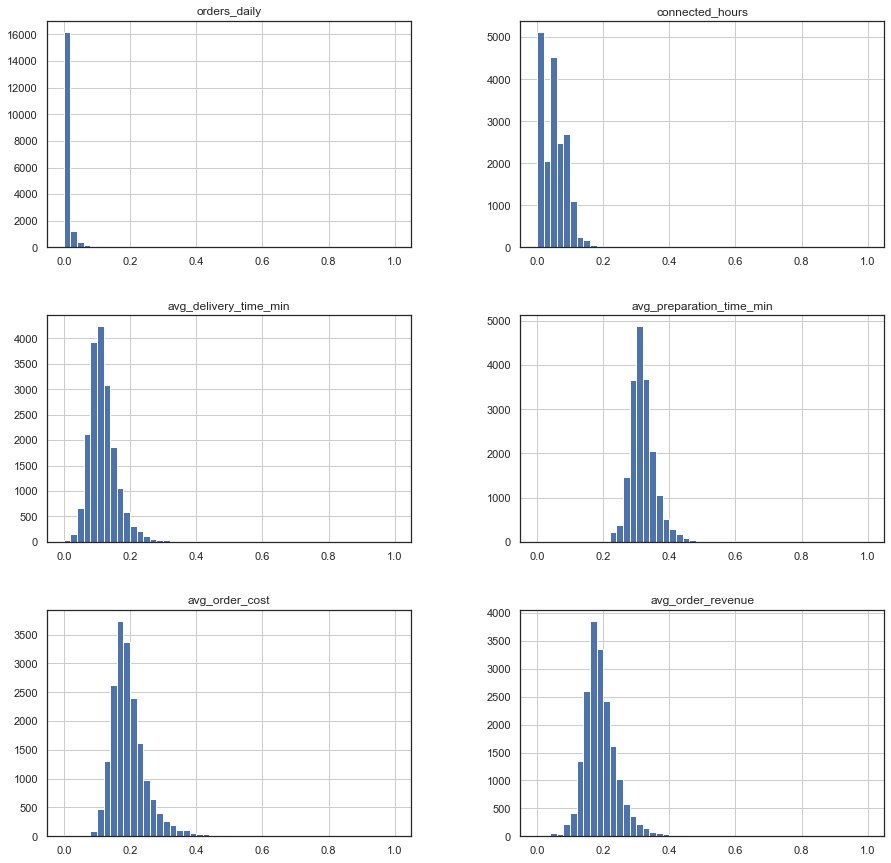

In [141]:
# check the distribution after scaling 
scaled_s_metrics_df.hist(bins=50,figsize=(15,15));

### Import model and set parameters 

In [142]:
from sklearn.cluster import KMeans

In [143]:
kmeans=KMeans(n_clusters=2, random_state=40)

In [144]:
cluster=kmeans.fit(scaled_s_metrics_df)

In [145]:
cluster.cluster_centers_

array([[0.00619067, 0.04287239, 0.15633469, 0.35185792, 0.25217809,
        0.21752865],
       [0.01531817, 0.05433654, 0.10261718, 0.30660198, 0.17347194,
        0.18190675]])

### add the cluster number back into the (unscaled) dataframe

In [146]:
s_metrics['experiment_group']=cluster.labels_

In [147]:
s_metrics['experiment_group'].value_counts()

1    13205
0     5407
Name: experiment_group, dtype: int64

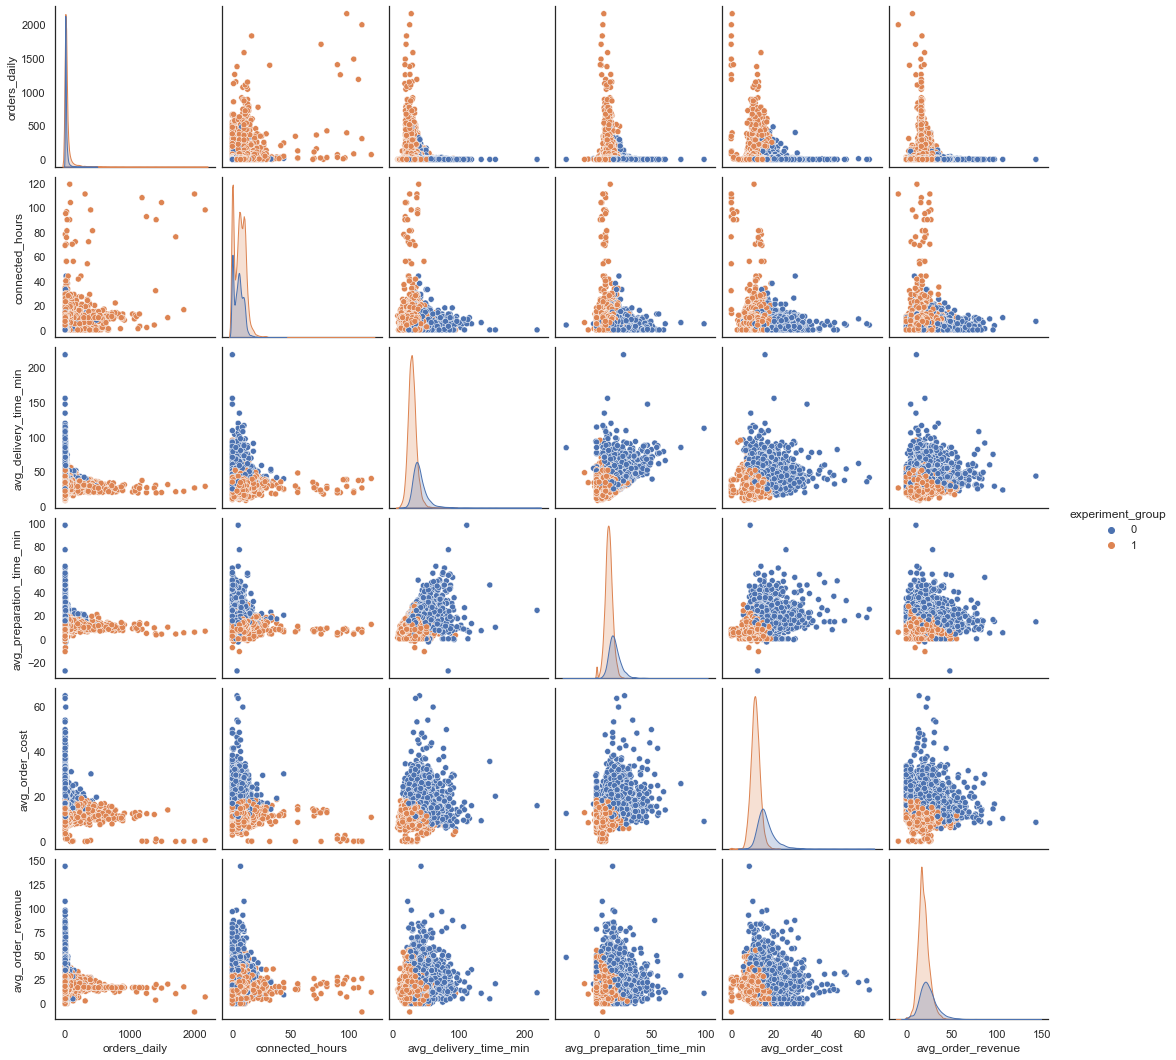

In [148]:
# review the groupings for consistency across the metrics 
sns.pairplot(s_metrics, hue='experiment_group');

In [149]:
#check groups against all segments 
# much better after removing 0 order cost 
# still issues on connected hours and orders daily 

### evaluate cluster and attempt to improve

In [150]:
cluster.inertia_

207.93708232760062

In [151]:
K=range(2,15) # whats the range of k that makes sense 
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(scaled_s_metrics_df)
    inertia.append(kmeans.inertia_)

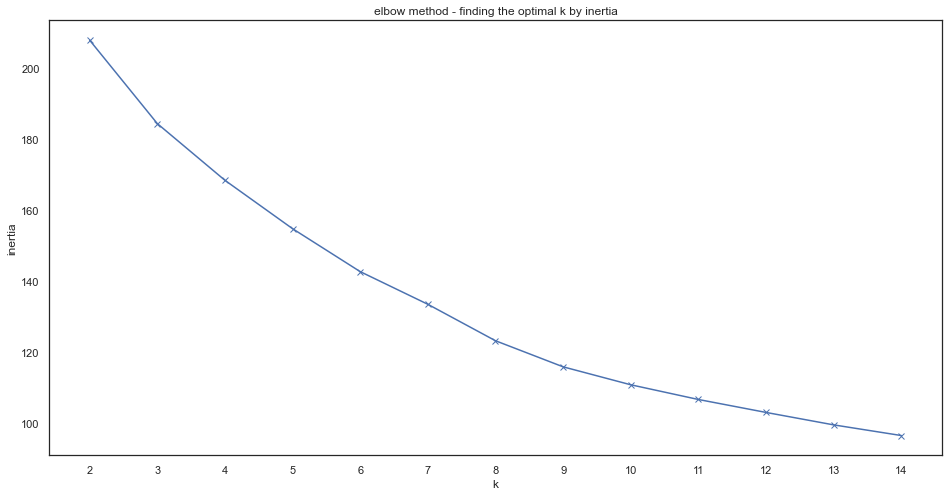

In [152]:
#plot the inertia: 
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method - finding the optimal k by inertia');

#### redo clustering as 4 groups to aggregate 

In [153]:
kmeans_2=KMeans(n_clusters=4, random_state=40)

In [154]:
cluster_2=kmeans_2.fit(scaled_s_metrics_df)

In [155]:
cluster_2.cluster_centers_

array([[0.00582595, 0.04462119, 0.13592095, 0.32078565, 0.19407538,
        0.26605484],
       [0.02534992, 0.09443626, 0.09682725, 0.30436912, 0.17372951,
        0.17436299],
       [0.00889229, 0.02217213, 0.10768357, 0.31216166, 0.17696764,
        0.17026412],
       [0.00615831, 0.0444736 , 0.16073053, 0.36482021, 0.2863303 ,
        0.18520505]])

In [156]:
s_metrics['experiment_group_2']=cluster_2.labels_

In [157]:
s_metrics['experiment_group_2'].value_counts()

2    6718
1    5423
0    3584
3    2887
Name: experiment_group_2, dtype: int64

# work for kpis 

In [159]:
all_data[(all_data.avg_order_cost!=0)&(all_data.country != 'UA')].describe()

,partner_id,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue,pctoftotal
count,3.353200e+04,33532.000000,33532.000000,33532.000000,33532.000000,33532.000000,33532.000000,33532.000000
mean,5.416382e+06,26.236312,5.880771,32.688168,12.871382,12.663376,19.667024,0.002079
std,2.383181e+06,76.473057,5.941500,10.483059,6.576785,3.992348,8.434313,0.006060
min,9.100000e+02,1.000000,0.000000,2.508333,-27.770000,0.016297,-8.798018,0.000079
25%,4.102491e+06,3.000000,2.000000,26.187702,9.520000,10.097263,14.765918,0.000238
50%,5.983648e+06,7.000000,6.000000,30.958755,12.064757,11.852614,18.447620,0.000555
75%,7.307216e+06,20.000000,9.000000,37.008899,15.232096,14.280305,23.184522,0.001585
max,8.718710e+06,2157.000000,124.000000,240.550000,646.170000,64.643340,325.943310,0.170936
